## Predicting Heart Disease Using Machine Learning
    This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diesease based on their medical attributes. 

    We're going to take the following approach:
    1. Problem Definition
    2. Data
    3. Evaluation
    4. Features
    5. Modeling
    6. Experimentation


## 1. Problem Definition
    In a statement
> Given clinical parameters about a patient can we predict whether or not they have heart diesease.

## 2. Data

    The original data cam from the Cleveland data from the UCI Machine Learning Repository. This is a version acquired from Kagle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
    If we can reach 95% accuaracy at predicting whether a patient has heart disease during the proof of conecpt we will pursue this project

## 4. Features
**Data Dictionary:**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing Tools
Pandas, Numpy, and Matlib for data analysis and manipulation

In [5]:
# Import all the tools we need


# Regular Exploratory Data Analysis (EDA) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want plots to appear inside the notebook
%matplotlib inline 

# Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [6]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration
##### Goal is to find out more information about the data and become an expert on the data we are working with

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What data is missing and how do we deal with it?
4. Where are the outliers and why should we care aobut them?
5. How can you remove, change, or add features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
# ^ Similar amount of examples in both class. This is a balanced classification problem

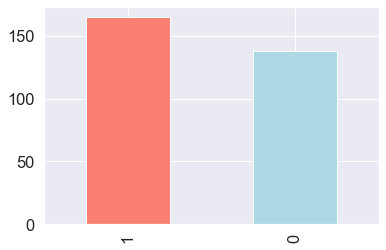

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Accodring to Sex

In [14]:
df.sex.value_counts()
# 1 = male
# 0 = female
# Data is predominately male

1    207
0     96
Name: sex, dtype: int64

In [1]:
pd.crosstab(df.target, df.sex)
#appears from comparison below that 75% of existing dataset for women have heart diesease. For men its about 50%.

NameError: name 'pd' is not defined

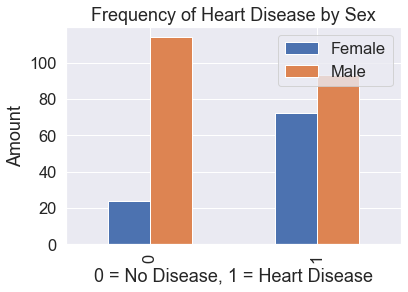

In [16]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar");
plt.title("Frequency of Heart Disease by Sex");
plt.ylabel("Amount")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.legend(["Female", "Male"]);

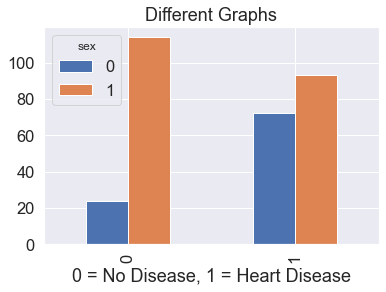

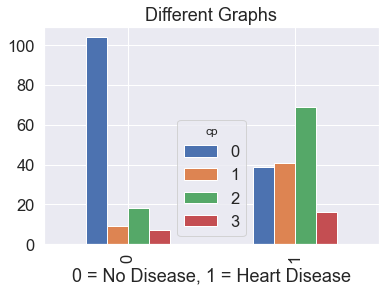

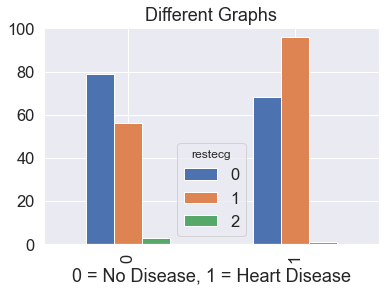

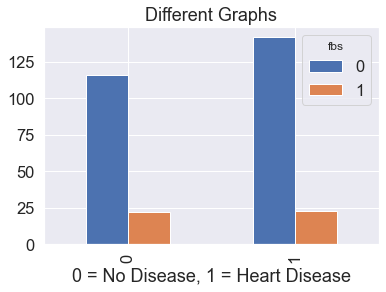

In [17]:
# Exploring Data
column_list = [df.sex, df.cp, df.restecg, df.fbs]

for column in column_list:
    pd.crosstab(df.target, column).plot(kind="bar")
    plt.title("Different Graphs");
    plt.xlabel("0 = No Disease, 1 = Heart Disease")

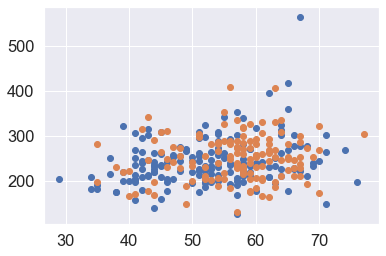

In [18]:
# Exploring Data
scatter_list = [df.trestbps, df.thalach, df.chol]

plt.scatter(df.age[df.target==1], df.chol[df.target==1])
plt.scatter(df.age[df.target==0], df.chol[df.target==0])

In [19]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


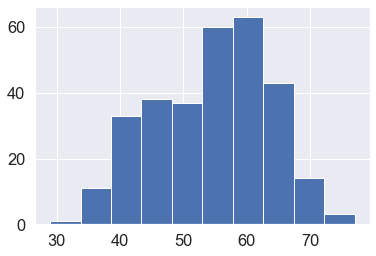

In [20]:
df["age"].hist();

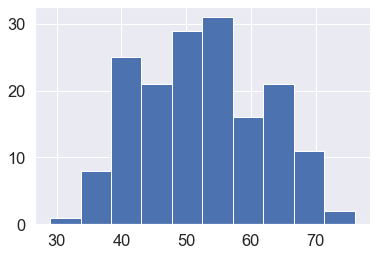

In [21]:
# age of people who do have heart disease
df.age[df.target==1].hist();

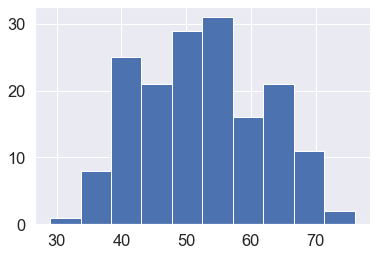

In [22]:
df["age"][df["target"]==1].hist();
# different way to write same thing

In [23]:
## Heart Diesease Correlatin Matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


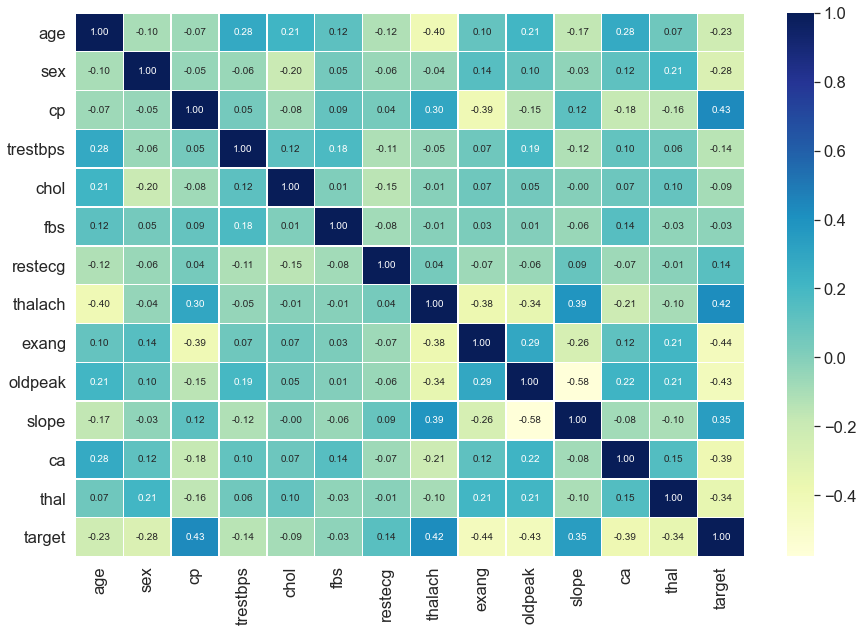

In [24]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Split data into training and test groups
X = df.drop("target", axis=1)
y = df["target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

### What Model Should We Choose?

Data is split. Map is used to determine best model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We're going to try three different machine learning models
1. Logistic Regression
2. K Nearest NeighborC lassifier
3. Random Forrest Classifier

In [29]:
# Put Models in Dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forrest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given learning models
    models : a dict of different Scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing data
    """
    # Set Random Seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Make a loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/opt/anaconda3/envs/Heart-Disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Random Forrest': 0.8360655737704918}

### Model Comparison

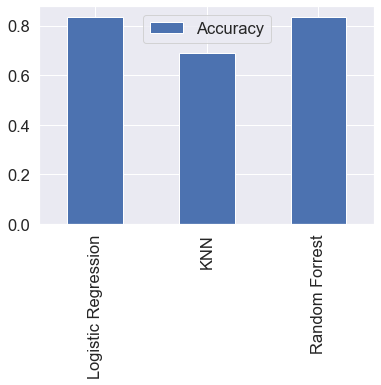

In [31]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Now we have our baseline model: Logistic Regression. We know a model's first predictions are not always what we should base our next steps off. What should we do next?

What we are going to tackle for our Classification Model:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC score
* Area under the curve (AUC)

#### Search online for info on hyperparameter tuning for models

In [32]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores, test_scores

([1.0,
  0.8347107438016529,
  0.8099173553719008,
  0.768595041322314,
  0.78099173553719,
  0.756198347107438,
  0.756198347107438,
  0.7396694214876033,
  0.7272727272727273,
  0.6900826446280992,
  0.6942148760330579,
  0.7066115702479339,
  0.7107438016528925,
  0.7066115702479339,
  0.6859504132231405,
  0.6983471074380165,
  0.6859504132231405,
  0.6942148760330579,
  0.6694214876033058,
  0.6900826446280992],
 [0.6065573770491803,
  0.6229508196721312,
  0.639344262295082,
  0.6229508196721312,
  0.6885245901639344,
  0.639344262295082,
  0.639344262295082,
  0.6229508196721312,
  0.6229508196721312,
  0.6065573770491803,
  0.6065573770491803,
  0.6557377049180327,
  0.6229508196721312,
  0.5901639344262295,
  0.5901639344262295,
  0.5737704918032787,
  0.6065573770491803,
  0.6557377049180327,
  0.639344262295082,
  0.6557377049180327])

Maximum KNN score on the test data: 68.85%


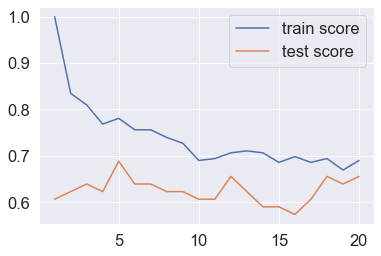

In [34]:
plt.plot(neighbors, train_scores, label="train score");
plt.plot(neighbors, test_scores, label="test score");
plt.xlabel="Number of neighbors"
plt.ylabel="score"
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

##### ^KNN still hasn't reached the score levels of the other models (Linear Regresion, and Random Forrest Classifier) so we're going to scrap it for this project

## Hyperparameter tuning with RandomizedSearchCV

#### We're going to tune:
* Logisitics Regresssion
* Random Forrest Classifier

    ...using RandomizedSearchCV

#### Really need to google and look up different models to better understand the underlying paramaters

In [35]:
# Create a hyperparameter grid for logisitc regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForrestClassifier
rf_grid = {"n_estimators" : np.arange(10, 100, 5),
          "max_depth" : [None, 3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(2,20,2)}

Now we've got hyperparamters set up for each of our models. Now we will tune them using `RandomizedSearchCV`

In [36]:
# Tune Logistic Regression
np.random.seed(42)

# Setup Random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparamter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [39]:
# Now we've tuned logistic regression. Lets do the same for random forrest classifier

In [40]:
np.random.seed(42)

#Setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=50,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   25.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': 55,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': None}

In [42]:
rs_rf.score(X_test, y_test)

0.8360655737704918

Randomized seach randomly selects combinations to determine which model is the best model. GridSearchCV exhaustively searches through hyperparameters. 

Order:
* You can go by hand, 
* then RandomizedSearchCV, 
* then GridSearchCV. Narrowing down selections as you do so.


### Hyperparameter Tuning with GridSearchCV

Since our logisticsregression model rovides the best socre thus far we will try and improve them using GridSearchCV

In [59]:
# Different hyperparameters for our logistics regression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


In [60]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

### Evaluating our tuned machine learning classifier beyond accuracy

What do we want:
* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

    ... and it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model we first need to make predictions

In [62]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [63]:
y_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

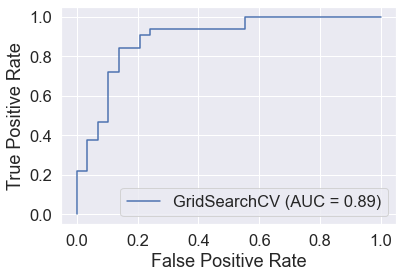

In [64]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [65]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[20,  9],
       [ 2, 30]])

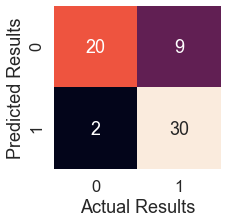

In [76]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False
                    )
    ax.set(xlabel='Actual Results', ylabel='Predicted Results')
plot_conf_mat(y_test, y_preds)

In [78]:
print(classification_report(y_test, y_preds))
# Classification report is only being run on one train test split. Need to run on 5+ fold cross-validation

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.77      0.94      0.85        32

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.84      0.82      0.82        61



### Calculate evaluation metrics using cross validation
##### We are going to calculate precision, recall, f1 using cross validation
Using `cross_val_score()`

In [79]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [82]:
# Create a new classifier with the best params from before
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

In [104]:
#Cross Validated Accuracy
cv_acc = np.mean(cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy"))
cv_acc

0.8446994535519124

In [105]:
# Cross Validated Precision
cv_prec = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision"))
cv_prec

0.8207936507936507

In [92]:
# Cross Validated Recall
cv_recall = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5,
                                   scoring="recall"))
cv_recall

0.9212121212121213

In [95]:
# Cross Validated f1
cv_f1 = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5,
                                   scoring="f1"))
cv_f1

0.8673007976269721

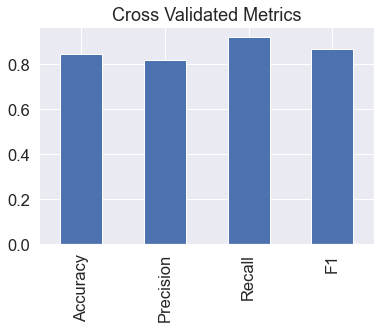

In [109]:
# visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_prec,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Metrics",
                legend=False);

### Feature Importance

Feature importance is another way of asking "which feature contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. Need to google information on the web: "(MODEL NAME) Feature Importance"

Lets find feature importance for our Logistical Regression

In [113]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [116]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(X_train, y_train);

In [117]:
# Check Coeefficient
clf.coef_

array([[ 0.00904129, -0.94134859,  0.69574291, -0.01869211, -0.00240483,
        -0.07453194,  0.38685764,  0.02992384, -0.4267784 , -0.54458979,
         0.396984  , -0.68343814, -0.57672651]])

In [120]:
# Match coeffs of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009041289329931403,
 'sex': -0.9413485928153659,
 'cp': 0.6957429071618316,
 'trestbps': -0.018692111315607118,
 'chol': -0.002404834208530558,
 'fbs': -0.07453194276842341,
 'restecg': 0.38685763830552455,
 'thalach': 0.02992384045323189,
 'exang': -0.42677840080683144,
 'oldpeak': -0.5445897912876201,
 'slope': 0.3969840036606768,
 'ca': -0.6834381372893583,
 'thal': -0.5767265054131407}

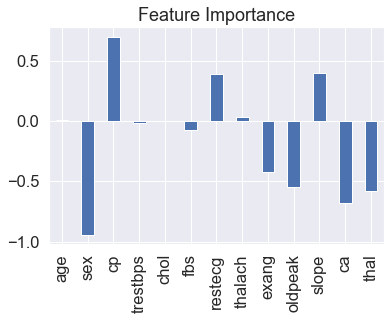

In [123]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [124]:
#simialr to heatmap

### 6. Experimentation (which we have been doing above)

I haven't hit my evaluation metric yet...

* Could I collect more data?
* Could I try a better model? Like CatBoost or XGBoost
* Could I improve the current models? (beyond what we've done thus far)


In [1]:
# Moving forward
    # Don't be afraid to be wrong
    # Reach out to others
    # Look online
    # Find examples
    # Reasearch models
    # Research hyperparameter tuning